In [2]:
from datetime import datetime
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install xlsxwriter

# Endereços dos Dados
ENDERECO_DADOS = r'./../../../bronze/'


# obtenção de dados
try:
    print('Obtendo dados do arquivo parquet...')

    # hora de início
    hora_inicio = datetime.now()

    # retornar o plano de execução
    df_bf_exec_plan = pl.scan_parquet(ENDERECO_DADOS + 'bolsa_familia_str_cache.parquet')

    # executar o plano de execução e obter os dados
    df_bf = df_bf_exec_plan.collect() # coletar os dados do plano de execução

    print(df_bf.head())
    print(df_bf.columns)
    print(df_bf.dtypes)

    # hora de término
    hora_fim = datetime.now()

    print(f'Tempo de execução: {hora_fim - hora_inicio}')

    print('Dados obtidos com sucesso!')

except Exception as e:
    print(f'Erro ao obter dados: {e}')

# Processando as informações
try:
    # marcar a hora de início
    hora_inicio = datetime.now()

    # Criar um array com os valores da parcela
    array_valor_parcela = np.array(df_bf['VALOR PARCELA'])

except Exception as e:
    print(f'Erro ao obter dados: {e}')


Obtendo dados do arquivo parquet...
shape: (5, 9)
┌────────────┬────────────┬─────┬────────────┬───┬────────────┬────────────┬───────────┬───────────┐
│ MÊS COMPET ┆ MÊS        ┆ UF  ┆ CÓDIGO     ┆ … ┆ CPF        ┆ NIS        ┆ NOME FAVO ┆ VALOR     │
│ ÊNCIA      ┆ REFERÊNCIA ┆ --- ┆ MUNICÍPIO  ┆   ┆ FAVORECIDO ┆ FAVORECIDO ┆ RECIDO    ┆ PARCELA   │
│ ---        ┆ ---        ┆ cat ┆ SIAFI      ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ str        ┆ str        ┆     ┆ ---        ┆   ┆ str        ┆ i64        ┆ str       ┆ f64       │
│            ┆            ┆     ┆ i64        ┆   ┆            ┆            ┆           ┆           │
╞════════════╪════════════╪═════╪════════════╪═══╪════════════╪════════════╪═══════════╪═══════════╡
│ 202501     ┆ 202308     ┆ SP  ┆ 7071       ┆ … ┆ ***.085.10 ┆ 2064389044 ┆ FERNANDA  ┆ 650.0     │
│            ┆            ┆     ┆            ┆   ┆ 6-**       ┆ 5          ┆ RAMOS     ┆           │
│            ┆            ┆     ┆        

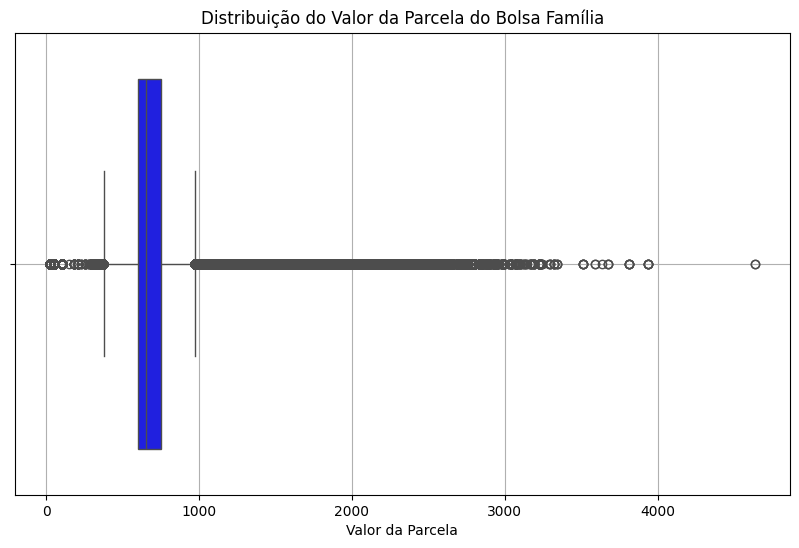

In [5]:
try:
    # Criar o gráfico
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=array_valor_parcela, color='blue')
    plt.title('Distribuição do Valor da Parcela do Bolsa Família')
    plt.xlabel('Valor da Parcela')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f'Erro ao criar o gráfico: {e}')
